sktime supports a number of commonly used forecasters, many of them interfaced from state-of-art forecasting packages. All forecasters are available under the unified sktime interface.

The main classes that are currently stably supported are:

 - ExponentialSmoothing, ThetaForecaster, and autoETS from statsmodels
 - ARIMA and autoARIMA from pmdarima
 - BATS and TBATS from tbats
 - PolynomialTrend for forecasting polynomial trends
 - Prophet which interfaces Facebook prophet
 
For illustration, all estimators below will be presented on the basic forecasting workflow - though they also support the advanced forecasting and evaluation workflows under the unified sktime interface (see Section 1).

For use in the other workflows, simply replace the "forecaster specification block" ("forecaster=") by the forecaster specification block in the examples presented below.

Generally, all forecasters available in sktime can be listed with the all_estimators command:

In [2]:
from sktime.registry import all_estimators


C:\Users\trana\.conda\envs\sktime_env\lib\site-packages\sktime\utils\validation\series.py:21: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  VALID_INDEX_TYPES = (pd.Int64Index, pd.RangeIndex, pd.PeriodIndex, pd.DatetimeIndex)
C:\Users\trana\.conda\envs\sktime_env\lib\site-packages\sktime\datatypes\_series\_check.py:43: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  VALID_INDEX_TYPES = (pd.Int64Index, pd.RangeIndex, pd.PeriodIndex, pd.DatetimeIndex)
C:\Users\trana\.conda\envs\sktime_env\lib\site-packages\sktime\datatypes\_hierarchical\_check.py:50: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  VALID_INDEX_TYPES = (pd.Int64Index, pd.RangeIndex, pd.PeriodIndex, pd.Datet

In [ ]:
import pandas as pd


In [6]:
# all_estimators returns list of pairs - data frame conversion for pretty printing
all_estimators("forecaster", as_dataframe=True)

C:\Users\trana\.conda\envs\sktime_env\lib\site-packages\sktime\registry\_lookup.py:158: ImportWarning: No module named 'esig'. 'esig' is a soft dependency and not included in the sktime installation. Please run: `pip install esig`. To install all soft dependencies, run: `pip install sktime[all_extras]`
  warnings.warn(str(e), ImportWarning)
C:\Users\trana\.conda\envs\sktime_env\lib\site-packages\sktime\registry\_lookup.py:158: ImportWarning: No module named 'tbats'. 'tbats' is a soft dependency and not included in the sktime installation. Please run: `pip install tbats`. To install all soft dependencies, run: `pip install sktime[all_extras]`
  warnings.warn(str(e), ImportWarning)


,name,estimator
0,ARIMA,<class 'sktime.forecasting.arima.ARIMA'>
1,AutoARIMA,<class 'sktime.forecasting.arima.AutoARIMA'>
2,AutoETS,<class 'sktime.forecasting.ets.AutoETS'>
3,AutoEnsembleForecaster,<class 'sktime.forecasting.compose._ensemble.A...
4,ColumnEnsembleForecaster,<class 'sktime.forecasting.compose._column_ens...
5,Croston,<class 'sktime.forecasting.croston.Croston'>
6,DirRecTabularRegressionForecaster,<class 'sktime.forecasting.compose._reduce.Dir...
7,DirRecTimeSeriesRegressionForecaster,<class 'sktime.forecasting.compose._reduce.Dir...
8,DirectTabularRegressionForecaster,<class 'sktime.forecasting.compose._reduce.Dir...
9,DirectTimeSeriesRegressionForecaster,<class 'sktime.forecasting.compose._reduce.Dir...


All forecasters follow the same interface, and can be used in the workflows presented in Section 1.

We proceed by showcasing some commonnly used classes of forecasters.

In [10]:
# imports necessary for this chapter
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.utils.plotting import plot_series

# data loading for illustration (see section 1 for explanation)
y = load_airline()
y_train, y_test = temporal_train_test_split(y, test_size=36)
fh = ForecastingHorizon(y_test.index, is_relative=False)

C:\Users\trana\.conda\envs\sktime_env\lib\site-packages\sktime\datasets\_single_problem_loaders.py:658: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  y = pd.read_csv(path, index_col=0, squeeze=True, dtype={1: float})


2.1 exponential smoothing, theta forecaster, autoETS from statsmodels
sktime interfaces a number of statistical forecasting algorithms from statsmodels: exponential smoothing, theta, and auto-ETS.

For example, to use exponential smoothing with an additive trend component and multiplicative seasonality on the airline data set, we can write the following. Note that since this is monthly data, a good choice for seasonal periodicity (sp) is 12 (= hypothesized periodicity of a year).

In [11]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing


C:\Users\trana\.conda\envs\sktime_env\lib\site-packages\sktime\forecasting\base\adapters\_statsmodels.py:50: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  if isinstance(y, pd.Series) and type(y.index) == pd.Int64Index:
C:\Users\trana\.conda\envs\sktime_env\lib\site-packages\sktime\utils\datetime.py:40: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return pd.Int64Index([d.n / count for d in duration])
C:\Users\trana\.conda\envs\sktime_env\lib\site-packages\sktime\utils\validation\series.py:274: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return type(index) in (pd.Int64Index, pd.RangeIndex)


0.05027649626033161

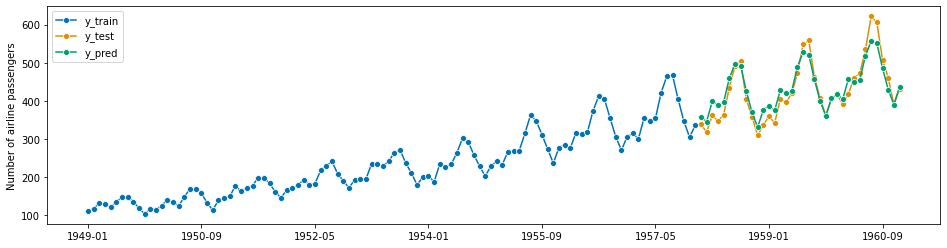

In [12]:
forecaster = ExponentialSmoothing(trend="add", seasonal="additive", sp=12)

forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_pred, y_test)

The exponential smoothing of state space model can also be automated similar to the ets function in R. This is implemented in the AutoETS forecaster.

In [13]:
from sktime.forecasting.ets import AutoETS


C:\Users\trana\.conda\envs\sktime_env\lib\site-packages\sktime\forecasting\base\adapters\_statsmodels.py:50: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  if isinstance(y, pd.Series) and type(y.index) == pd.Int64Index:
C:\Users\trana\.conda\envs\sktime_env\lib\site-packages\sktime\utils\datetime.py:40: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return pd.Int64Index([d.n / count for d in duration])
C:\Users\trana\.conda\envs\sktime_env\lib\site-packages\sktime\utils\validation\series.py:274: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return type(index) in (pd.Int64Index, pd.RangeIndex)


0.06319952365548633

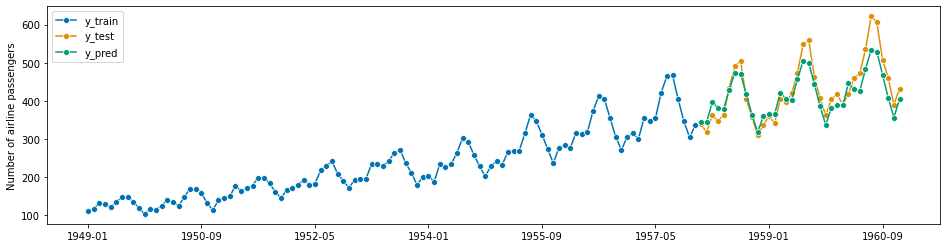

In [14]:
forecaster = AutoETS(auto=True, sp=12, n_jobs=-1)

forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_pred, y_test)

2.2 ARIMA and autoARIMA
sktime interfaces pmdarima for its ARIMA class models. For a classical ARIMA model with set parameters, use the ARIMA forecaster:



In [15]:
from sktime.forecasting.arima import ARIMA


C:\Users\trana\.conda\envs\sktime_env\lib\site-packages\sktime\utils\datetime.py:40: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return pd.Int64Index([d.n / count for d in duration])
C:\Users\trana\.conda\envs\sktime_env\lib\site-packages\sktime\utils\validation\series.py:274: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return type(index) in (pd.Int64Index, pd.RangeIndex)


0.04257105873626785

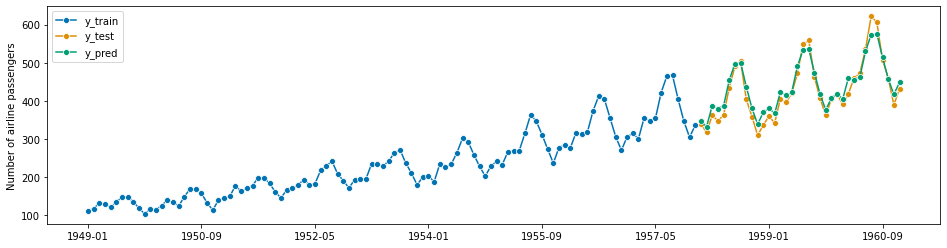

In [16]:
forecaster = ARIMA(
    order=(1, 1, 0), seasonal_order=(0, 1, 0, 12), suppress_warnings=True
)

forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_pred, y_test)

AutoARIMA is an automatically tuned ARIMA variant that obtains the optimal pdq parameters automatically:


In [17]:
from sktime.forecasting.arima import AutoARIMA


C:\Users\trana\.conda\envs\sktime_env\lib\site-packages\sktime\utils\datetime.py:40: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return pd.Int64Index([d.n / count for d in duration])
C:\Users\trana\.conda\envs\sktime_env\lib\site-packages\sktime\utils\validation\series.py:274: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return type(index) in (pd.Int64Index, pd.RangeIndex)


0.041170623698180774

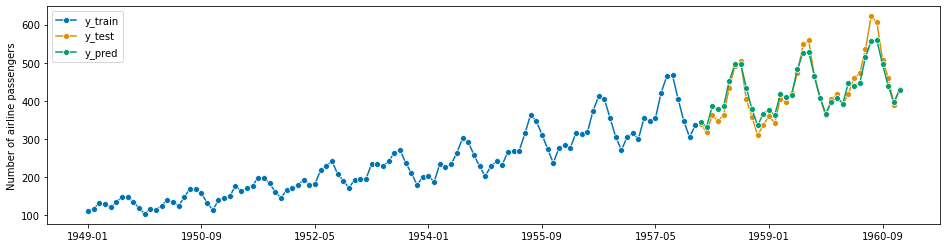

In [18]:
forecaster = AutoARIMA(sp=12, suppress_warnings=True)

forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_pred, y_test)

In [19]:
# to obtain the fitted parameters, run
forecaster.get_fitted_params()
# should these not include pdq?

{'ar.L1': -0.24111778802649925,
 'sigma2': 92.74986366818378,
 'order': (1, 1, 0),
 'seasonal_order': (0, 1, 0, 12),
 'aic': 704.0011679024122,
 'aicc': 704.131602685021,
 'bic': 709.1089216856134,
 'hqic': 706.0650836394137}

2.3 BATS and TBATS
sktime interfaces BATS and TBATS from the tbats package.

In [20]:
from sktime.forecasting.bats import BATS


ModuleNotFoundError: No module named 'tbats'. 'tbats' is a soft dependency and not included in the sktime installation. Please run: `pip install tbats`. To install all soft dependencies, run: `pip install sktime[all_extras]`

In [ ]:
forecaster = BATS(sp=12, use_trend=True, use_box_cox=False)

forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_pred, y_test)

In [ ]:
from sktime.forecasting.tbats import TBATS


In [ ]:
forecaster = TBATS(sp=12, use_trend=True, use_box_cox=False)

forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_pred, y_test)

2.4 Facebook prophet
sktime provides an interface to fbprophet by Facebook.


In [21]:
from sktime.forecasting.fbprophet import Prophet


The current interface does not support period indices, only pd.DatetimeIndex. Consider improving this by contributing the sktime.


In [22]:
# Convert index to pd.DatetimeIndex
z = y.copy()
z = z.to_timestamp(freq="M")
z_train, z_test = temporal_train_test_split(z, test_size=36)

C:\Users\trana\.conda\envs\sktime_env\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\trana\.conda\envs\sktime_env\lib\site-packages\sktime\utils\datetime.py:40: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return pd.Int64Index([d.n / count for d in duration])
C:\Users\trana\.conda\envs\sktime_env\lib\site-packages\sktime\forecasting\base\_fh.py:337: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  cutoff = _coerce_to_period(cutoff, freq=cutoff.freqstr)
C:\Users\trana\.conda\envs\sktime_env\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

0.06939056917256975

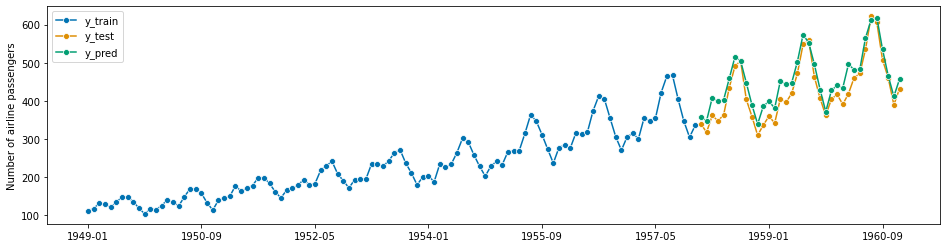

In [23]:
forecaster = Prophet(
    seasonality_mode="multiplicative",
    n_changepoints=int(len(y_train) / 12),
    add_country_holidays={"country_name": "Germany"},
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
)

forecaster.fit(z_train)
y_pred = forecaster.predict(fh.to_relative(cutoff=y_train.index[-1]))
y_pred.index = y_test.index

plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_pred, y_test)

2.5 State Space Model (Structural Time Series)
We can also use the UnobservedComponents class from statsmodels to generate predictions using a state space model.



In [ ]:
from sktime.forecasting.structural import UnobservedComponents
